# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 1
*gelöst von Stollmayer Max*

### Aufgabe 1

\begin{cases}
    \ddot{y}_1 = t^2 - \dot{y}_1 - y_2^2 \\
    \ddot{y}_2 = t + \dot{y}_2 + y_1^3 \\
    y_1(0)=0, \dot{y}_1(0)=1, y_2(0)=1, \dot{y}_2(0)=0
\end{cases}

wird umgeschrieben zu einem System 1. Ordnung:

\begin{cases}
    \dot{y}_1 = y_3 \\
    \dot{y}_2 = y_4 \\
    \dot{y}_3 = t^2 - y_3 - y_2^2 \\
    \dot{y}_4 = t + y_4 + y_1^3 \\
    y_1(0)=0, y_2(0)=1, y_3(0)=1, y_4(0)=0
\end{cases}

### Aufgabe 2: Euler-Verfahren

#### Definition

In [1]:
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
def euler(f,y0,t0,tN,N):
    h = (tN-t0)/N
    t = t0 + h*np.arange(N+1)
    y = np.array([y0])
    for n in range(1,N+1):
        y = np.append(y,[y[n-1] + h*f(t[n-1],y[n-1])],axis=0)
    return t, y

#### Test 1

In [3]:
def f(t,y):
    return y

t, y = euler(f,1,1,4,10)
for x, z in zip(t, y):
    print("y(%0.2f) = %0.2f" % (x, z))

y(1.00) = 1.00
y(1.30) = 1.30
y(1.60) = 1.69
y(1.90) = 2.20
y(2.20) = 2.86
y(2.50) = 3.71
y(2.80) = 4.83
y(3.10) = 6.27
y(3.40) = 8.16
y(3.70) = 10.60
y(4.00) = 13.79


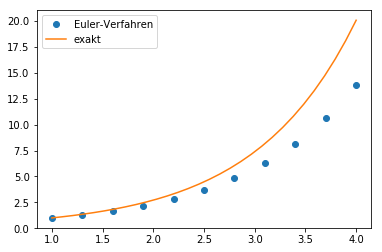

In [4]:
t2 = np.linspace(1, 4, 30)
y2 = np.exp(t2-1)

plt.plot(t, y, "o", label='Euler-Verfahren')
plt.plot(t2, y2, label='exakt')
plt.legend()

#### Test 2

In [5]:
def g(t,y,a,b,c,d):
    return np.array([-(a-b*y[1])*y[0],(c-d*y[0])*y[1]])

def f(t,y):
    return g(t,y,1,0.1,4,1)

t, y = euler(f,[3,5],0,10,10)
for s, p in zip(t, y):
    print("t=%2d:  %10.2E Räuber,  %10.2E Beute" % (s, p[0], p[1]))

t= 0:    3.00E+00 Räuber,    5.00E+00 Beute
t= 1:    1.50E+00 Räuber,    1.00E+01 Beute
t= 2:    1.50E+00 Räuber,    3.50E+01 Beute
t= 3:    5.25E+00 Räuber,    1.22E+02 Beute
t= 4:    6.43E+01 Räuber,   -3.06E+01 Beute
t= 5:   -1.97E+02 Räuber,    1.82E+03 Beute
t= 6:   -3.58E+04 Räuber,    3.67E+05 Beute
t= 7:   -1.31E+09 Räuber,    1.31E+10 Beute
t= 8:   -1.72E+18 Räuber,    1.72E+19 Beute
t= 9:   -2.97E+36 Räuber,    2.97E+37 Beute
t=10:   -8.81E+72 Räuber,    8.81E+73 Beute


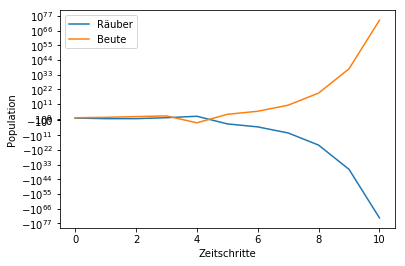

In [6]:
plt.plot(t, y[:,0], label="Räuber")
plt.plot(t, y[:,1], label="Beute")
plt.xlabel("Zeitschritte")
plt.ylabel("Population")
plt.yscale("symlog")
plt.legend()